In [15]:
from esercizio import extract_sentences_with_verb, extract_subject_object_pairs, create_semantic_clusters, analyze_semantic_clusters
import matplotlib.pyplot as plt

## Teoria sulle valenze di Patrick Hanks
La teoria si basa sul concetto di valenza, ovvero il numero di elementi che servono per completare il significato del verbo. In particolare l'esercizio richiedeva di prendere un verbo con valenza 2 e andare, usando un parser sintattico, a individuare i possibili fillers per gli slot *soggetto* e *oggetto* e poi raggrupparli in **tipi semantici**.

Il verbo scelto per l'esercizio è *to see*.
Di seguito viene chiamato il metodo per estrarre un certo numero di frasi che contengono il verbo in questione, considerando le diverse forme verbali.

In [16]:
verbs = ['see', 'sees', 'saw', 'seen', 'seeing']
sentences = extract_sentences_with_verb(verbs, 500)

### Estrazione coppie soggetto-oggetto
Date le frasi si estraggono quante più possibili coppie soggetto - oggetto con l'aiuto di un parsificatore (Spacy). Questo è un task complesso in quanto le frasi non hanno tutte lo stesso albero di dipendenze e non sempre l'oggetto ha una dipendenza *dobj*.
Il metodo prima estrae tutte le frasi "dirette", con dipendenze *nsubj* e *dobj*. Se uno dei non viene identificato cerca l'elemento con una dipendenza diversa, segunendo dei pattern che sono stati trovati nell'analisi manuale delle frasi.

Purtroppo il verbo scelto è molto presente anche in forma infinita o con una sola valenza, quindi il numero di frasi estratte è stato ottimizzato (in partenza su 500 frasi estraeva 109 coppie, ora ne estrae 235) ma non supera la metà delle frasi totali.

Per disambiguare i termini degli slot è stato usato l'**algoritmo di Lesk** e poi assegnati al tipo semantico, mentre termini come i pronomi sono stati disambiguati e assegnati ai semantic types manualmente.

In [17]:
t, new_s = extract_subject_object_pairs(verbs, sentences)

### Creazione cluster semantici
Il metodo crea un dizionario usando come chiavi le coppie semantic_types_soggetto - semantic_types_oggetto e assegnando ad ognuna il numero di frasi che hanno quella coppia e la lista delle frasi.

In [21]:
semantic_clusters = create_semantic_clusters(t)

### Frequenza
Il metodo prende i cluster semantici creati sopra e va a calcolarne la frequenza facendo per ogni chiave il rapporto tra il conteggio di quel cluster e il numero totali di cluster presenti.

In [22]:
cluster_frequencies = analyze_semantic_clusters(semantic_clusters)

### Grafico
Viene creato un grafico che rappresenta i cluester semantici e la loro frequenza tramite gli istogrammi.

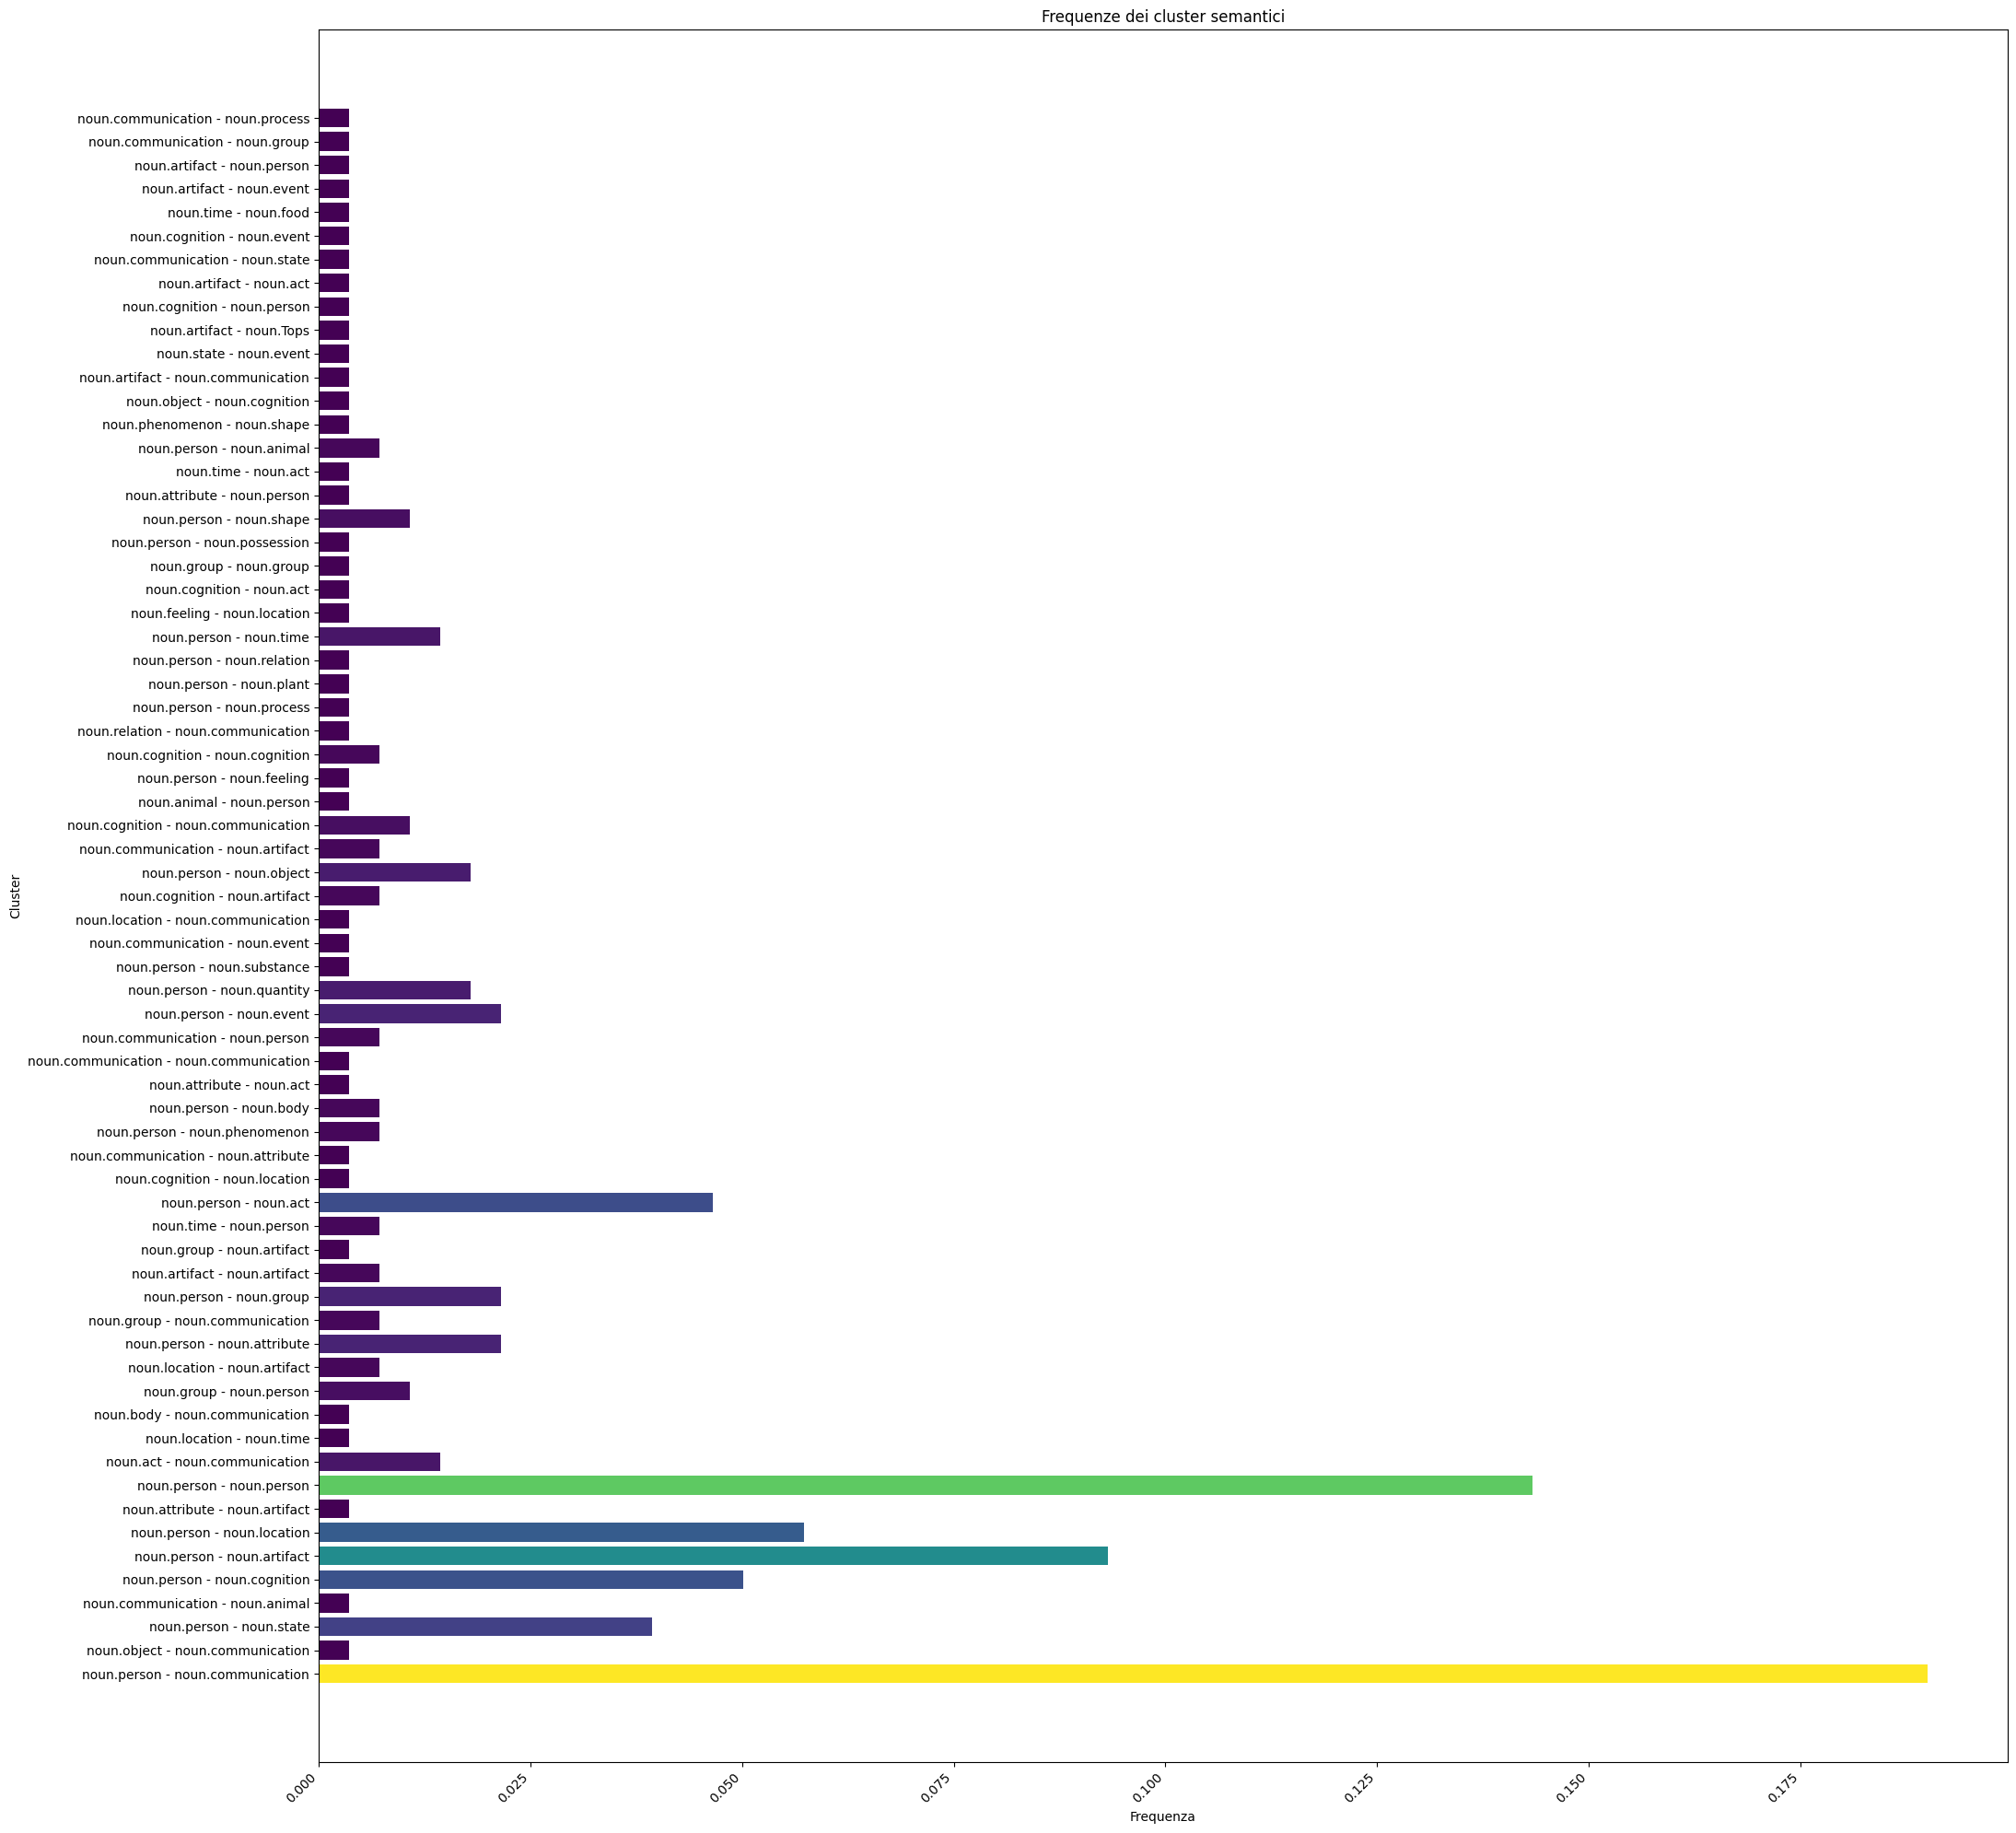

In [25]:
x_values = []
y_values = []

for cluster, frequency in cluster_frequencies.items():
    subj, obj = cluster
    x_values.append(f"{subj} - {obj}")
    y_values.append(frequency)

min_freq = min(y_values)
max_freq = max(y_values)
norm = plt.Normalize(min_freq, max_freq)
colors = plt.cm.viridis(norm(y_values))

plt.figure(figsize=(22, 20))
bars = plt.barh(x_values, y_values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Frequenza')
plt.ylabel('Cluster')
plt.title('Frequenze dei cluster semantici')

plt.tight_layout()
plt.show()